## Importing all required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Importing the data from link

In [2]:
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)
print("Done")

Done


In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Checking the shape of the data

In [4]:
print("The shape of the train_dataset is: {} rows and {} columns".format(data.shape[0], data.shape[1]))

The shape of the train_dataset is: 25 rows and 2 columns


## Checking for null values

In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


## Data Visualization

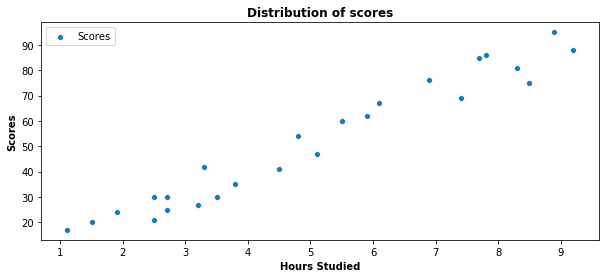

In [7]:
fig, (graph1) = plt.subplots(1,1, figsize = (10,4))

sns.scatterplot(data=data, x="Hours", y="Scores")
graph1.set_title('Distribution of scores', weight = 'bold')
graph1.set_xlabel('Hours Studied', weight = 'bold')
graph1.set_ylabel('Scores', weight = 'bold')
graph1.legend(labels = ['Scores']);

With the help of above graph we can see that there is a positive linear relationship.<br>
**Positive Linear Relationship** - It means that the slope is positive which tells if one increases other also increases.<br>

## Preparing the Data

Dividing the data into features and target

Here in this data,<br>
**Hours** is a **feature** and<br>
**Scores** is a **target**.

In [8]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [9]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

## Model Training

Splitting the data into test and training data.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
print("Model is trained")

Model is trained


## Plotting the regression line

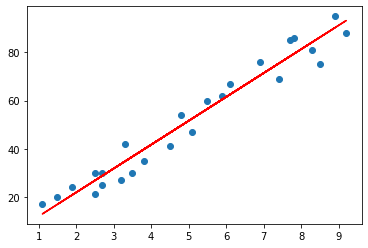

In [11]:
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line, color = 'red');
plt.show()

In [12]:
print(X_test)
y_pred = regressor.predict(X_test)
y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [13]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Comparing the trained and test scores

In [14]:
print("Trained Score: ", regressor.score(X_train, y_train))
print("Test score: ", regressor.score(X_test, y_test))

Trained Score:  0.9515510725211553
Test score:  0.9454906892105355


## Mean Absolute Errors

In [15]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


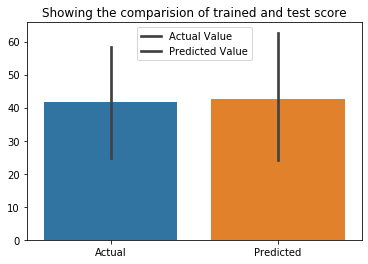

In [16]:
fig, (graph1) = plt.subplots(1,1, figsize = (6,4))

sns.barplot(data = df, palette = 'tab10')
graph1.set_title('Showing the comparision of trained and test score')
graph1.legend(labels = ['Actual Value', 'Predicted Value']);

In [17]:
hours = float(input("Enter the no. of hours: "))
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = regressor.predict(test)
print("No.of study hours per day = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Enter the no. of hours: 9.25
No.of study hours per day = 9.25
Predicted Score = 93.69173248737535
